In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [ ]:
d_set = pd.read_csv('breastDataset.csv')

In [ ]:
d_set

,Unnamed: 0,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
d_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               569 non-null    int64  
 1   id                       569 non-null    int64  
 2   diagnosis                569 non-null    object 
 3   radius_mean              569 non-null    float64
 4   texture_mean             569 non-null    float64
 5   perimeter_mean           569 non-null    float64
 6   area_mean                569 non-null    float64
 7   smoothness_mean          569 non-null    float64
 8   compactness_mean         569 non-null    float64
 9   concavity_mean           569 non-null    float64
 10  concave points_mean      569 non-null    float64
 11  symmetry_mean            569 non-null    float64
 12  fractal_dimension_mean   569 non-null    float64
 13  radius_se                569 non-null    float64
 14  texture_se               5

In [ ]:
d_set.drop(['Unnamed: 0', 'id'], axis = 1, inplace = True)

In [ ]:
d_set.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
d_set.shape

(569, 31)

In [ ]:
d_set

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
d_set.head(10)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
5,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510
8,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720
9,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750


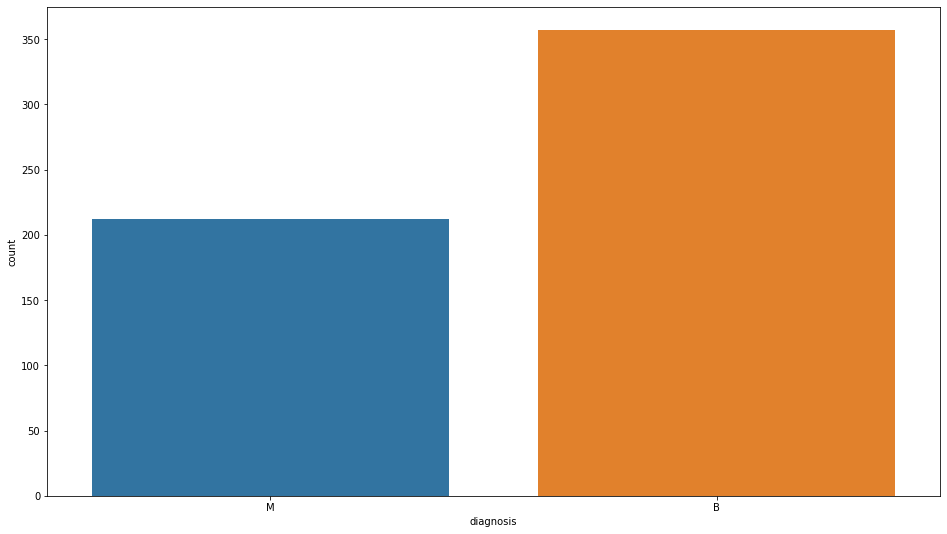

In [ ]:
plt.figure(figsize = (16, 9))
sns.countplot(x= d_set['diagnosis'])
plt.show()

In [ ]:
d_set['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [ ]:
d_set['diagnosis'] = LabelEncoder().fit_transform(d_set['diagnosis'])

In [ ]:
d_set['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [ ]:
d_set

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
d_set.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


## Median of good cells

In [ ]:
d_set.iloc[:, :11].groupby('diagnosis').median()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
0,12.200,17.39,78.18,458.4,0.09076,0.07529,0.03709,0.02344,0.1714,0.061540
1,17.325,21.46,114.20,932.0,0.10220,0.13235,0.15135,0.08628,0.1899,0.061575


## Mean of good cells

In [ ]:
d_set.iloc[:, :11].groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680


## Median Standard Error cells

In [ ]:
dsc = list(d_set.columns[11:21])
dsc.append('diagnosis')
print(dsc)

['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'diagnosis']


In [ ]:
d_set[dsc].groupby('diagnosis').median()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
diagnosis,,,,,,,,,,
0,0.2575,1.1080,1.8510,19.630,0.006530,0.01631,0.018400,0.009061,0.01909,0.002808
1,0.5472,1.1025,3.6795,58.455,0.006209,0.02859,0.037125,0.014205,0.01770,0.003739


## Mean Standard Error cells

In [ ]:
d_set[dsc].groupby('diagnosis').mean()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
diagnosis,,,,,,,,,,
0,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636
1,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062


In [ ]:
dmc = list(d_set.columns[21:])
dmc.append('diagnosis')
print(dsc)

['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'diagnosis']


## Median Worst Cell 

In [ ]:
d_set[dmc].groupby('diagnosis').median()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,
0,13.35,22.820,86.92,547.4,0.12540,0.16980,0.1412,0.07431,0.2687,0.07712
1,20.59,28.945,138.00,1303.0,0.14345,0.35635,0.4049,0.18200,0.3103,0.08760


In [ ]:
d_set[dmc].groupby('diagnosis').mean()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,
0,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


## Visualization

In [ ]:
dbm = d_set.iloc[:, 0:11]

In [ ]:
dsc = d_set[dsc]

In [ ]:
dmc = d_set[dmc]

In [ ]:
dbm.shape, dsc.shape, dmc.shape

((569, 11), (569, 11), (569, 11))

In [ ]:
dbm.columns, dsc.columns, dmc.columns

(Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
        'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
        'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'],
       dtype='object'),
 Index(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
        'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
        'fractal_dimension_se', 'diagnosis'],
       dtype='object'),
 Index(['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
        'smoothness_worst', 'compactness_worst', 'concavity_worst',
        'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst',
        'diagnosis'],
       dtype='object'))

In [ ]:
dbm.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


In [ ]:
dsc.corr()

,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,diagnosis
radius_se,1.000000,0.213247,0.972794,0.951830,0.164514,0.356065,0.332358,0.513346,0.240567,0.227754,0.567134
texture_se,0.213247,1.000000,0.223171,0.111567,0.397243,0.231700,0.194998,0.230283,0.411621,0.279723,-0.008303
perimeter_se,0.972794,0.223171,1.000000,0.937655,0.151075,0.416322,0.362482,0.556264,0.266487,0.244143,0.556141
area_se,0.951830,0.111567,0.937655,1.000000,0.075150,0.284840,0.270895,0.415730,0.134109,0.127071,0.548236
smoothness_se,0.164514,0.397243,0.151075,0.075150,1.000000,0.336696,0.268685,0.328429,0.413506,0.427374,-0.067016
compactness_se,0.356065,0.231700,0.416322,0.284840,0.336696,1.000000,0.801268,0.744083,0.394713,0.803269,0.292999
concavity_se,0.332358,0.194998,0.362482,0.270895,0.268685,0.801268,1.000000,0.771804,0.309429,0.727372,0.253730
concave points_se,0.513346,0.230283,0.556264,0.415730,0.328429,0.744083,0.771804,1.000000,0.312780,0.611044,0.408042
symmetry_se,0.240567,0.411621,0.266487,0.134109,0.413506,0.394713,0.309429,0.312780,1.000000,0.369078,-0.006522
fractal_dimension_se,0.227754,0.279723,0.244143,0.127071,0.427374,0.803269,0.727372,0.611044,0.369078,1.000000,0.077972


In [ ]:
dmc.corr()

,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
radius_worst,1.000000,0.359921,0.993708,0.984015,0.216574,0.475820,0.573975,0.787424,0.243529,0.093492,0.776454
texture_worst,0.359921,1.000000,0.365098,0.345842,0.225429,0.360832,0.368366,0.359755,0.233027,0.219122,0.456903
perimeter_worst,0.993708,0.365098,1.000000,0.977578,0.236775,0.529408,0.618344,0.816322,0.269493,0.138957,0.782914
area_worst,0.984015,0.345842,0.977578,1.000000,0.209145,0.438296,0.543331,0.747419,0.209146,0.079647,0.733825
smoothness_worst,0.216574,0.225429,0.236775,0.209145,1.000000,0.568187,0.518523,0.547691,0.493838,0.617624,0.421465
compactness_worst,0.475820,0.360832,0.529408,0.438296,0.568187,1.000000,0.892261,0.801080,0.614441,0.810455,0.590998
concavity_worst,0.573975,0.368366,0.618344,0.543331,0.518523,0.892261,1.000000,0.855434,0.532520,0.686511,0.659610
concave points_worst,0.787424,0.359755,0.816322,0.747419,0.547691,0.801080,0.855434,1.000000,0.502528,0.511114,0.793566
symmetry_worst,0.243529,0.233027,0.269493,0.209146,0.493838,0.614441,0.532520,0.502528,1.000000,0.537848,0.416294
fractal_dimension_worst,0.093492,0.219122,0.138957,0.079647,0.617624,0.810455,0.686511,0.511114,0.537848,1.000000,0.323872


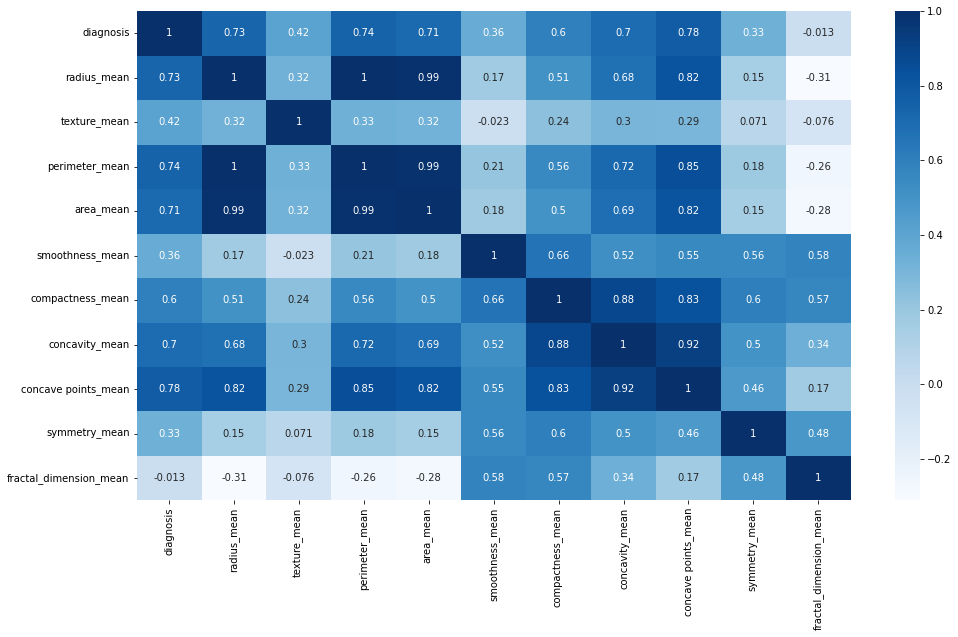

In [ ]:
plt.figure(figsize = (16, 9))
sns.heatmap(dbm.corr(),annot = True ,cmap = 'Blues')
plt.show()

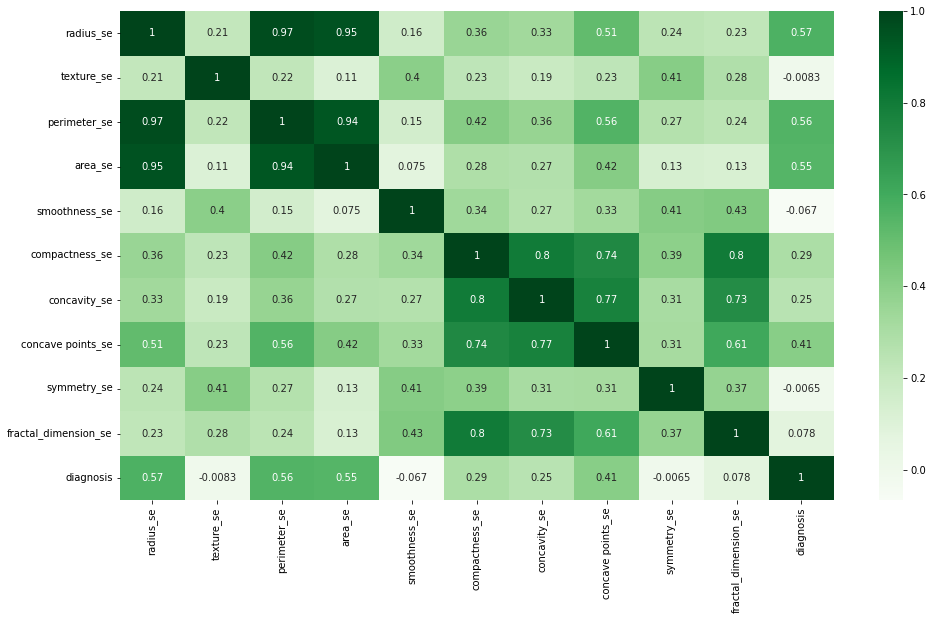

In [ ]:
plt.figure(figsize = (16, 9))
sns.heatmap(dsc.corr(),annot = True ,cmap = 'Greens')
plt.show()

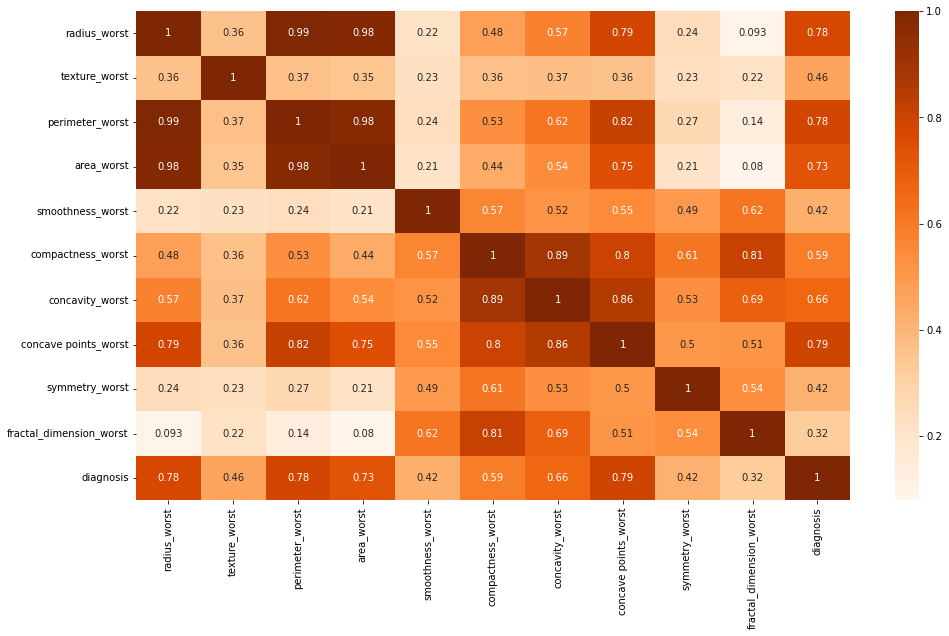

In [ ]:
plt.figure(figsize = (16, 9))
sns.heatmap(dmc.corr(),annot = True ,cmap = 'Oranges')
plt.show()

In [ ]:
feature = d_set.corr()['diagnosis'].abs().sort_values()[23:]

In [ ]:
feature.index

Index(['radius_mean', 'area_worst', 'perimeter_mean', 'radius_worst',
       'concave points_mean', 'perimeter_worst', 'concave points_worst',
       'diagnosis'],
      dtype='object')

<Figure size 1440x1440 with 0 Axes>

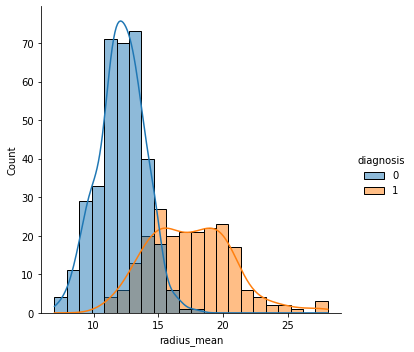

<Figure size 1440x1440 with 0 Axes>

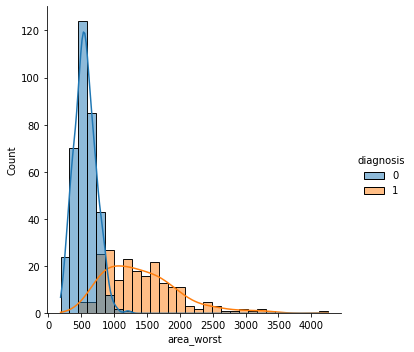

<Figure size 1440x1440 with 0 Axes>

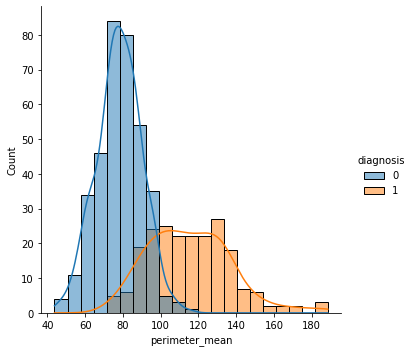

<Figure size 1440x1440 with 0 Axes>

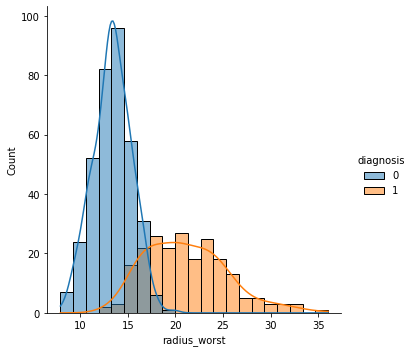

<Figure size 1440x1440 with 0 Axes>

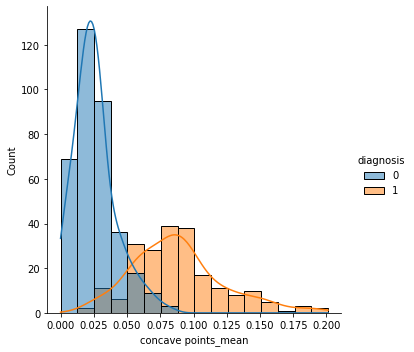

<Figure size 1440x1440 with 0 Axes>

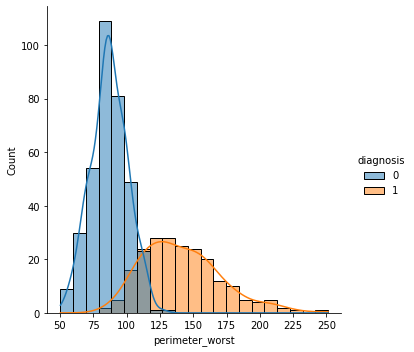

<Figure size 1440x1440 with 0 Axes>

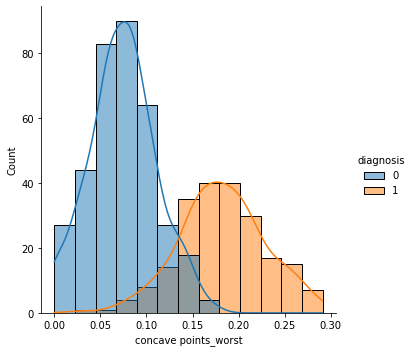

<Figure size 1440x1440 with 0 Axes>

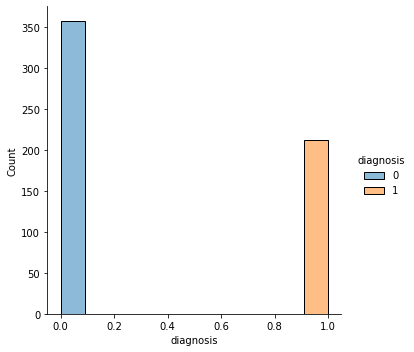

In [ ]:
for i in feature.index: 
    plt.figure(figsize = (20, 20))
    sns.displot(data = d_set, x = i ,hue = 'diagnosis', kde = True)
    plt.show()

<Figure size 288x288 with 0 Axes>

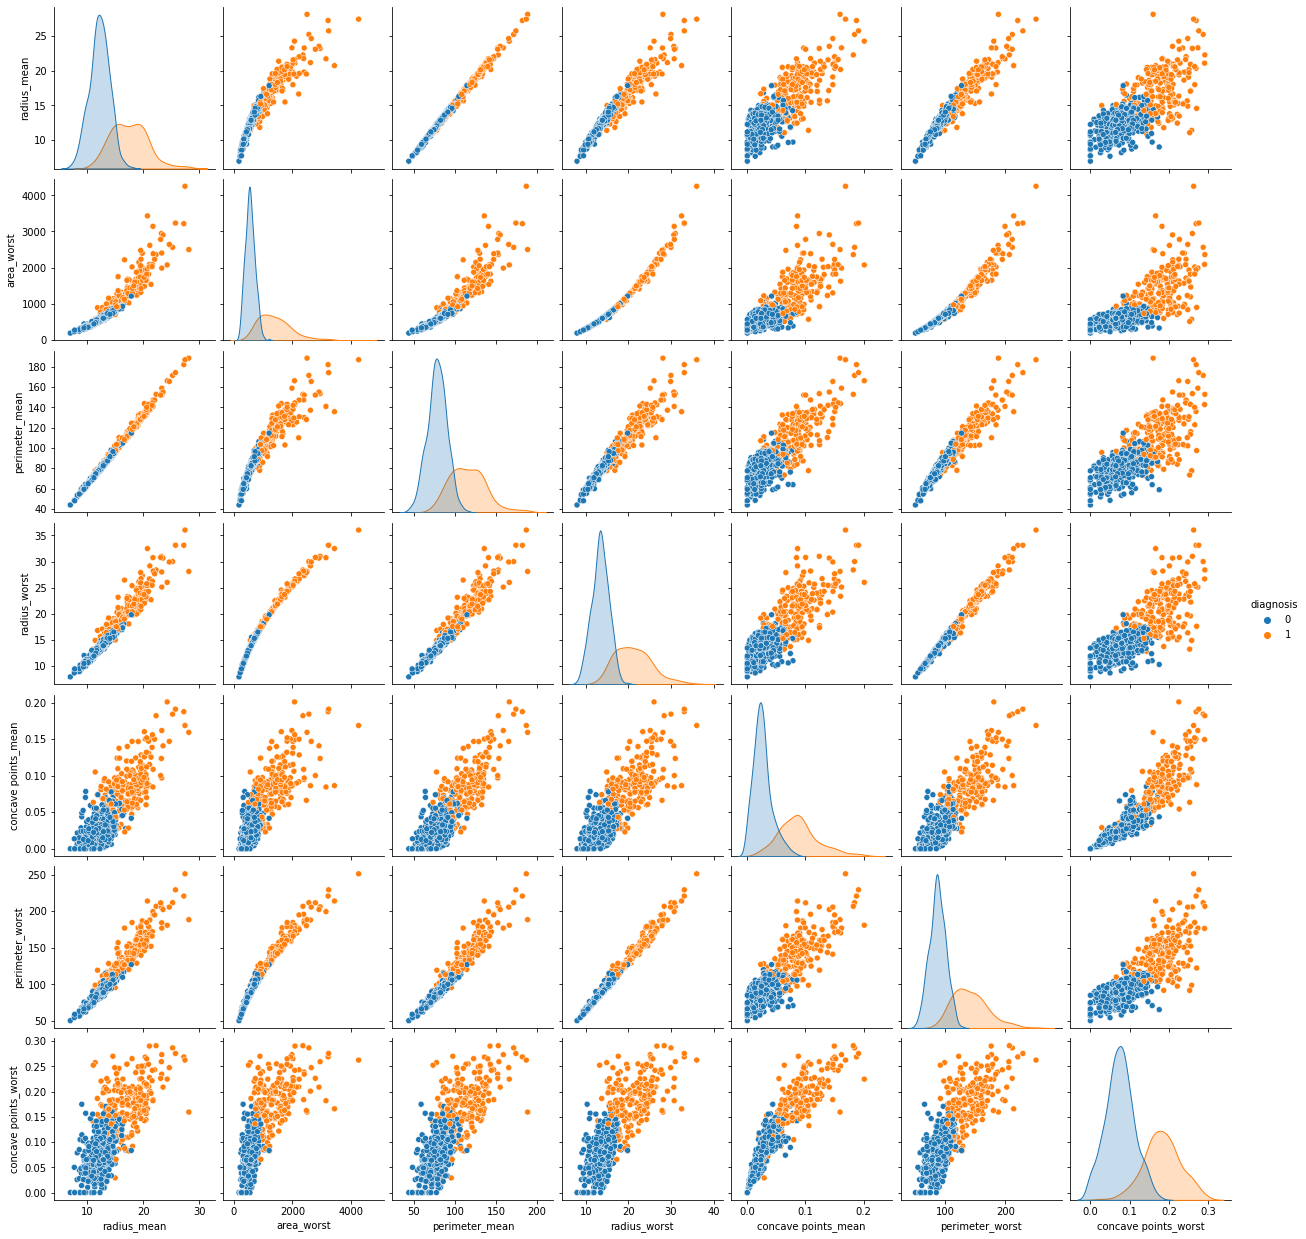

In [ ]:
plt.figure(figsize = (4, 4))
sns.pairplot(data = d_set[feature.index], hue = 'diagnosis')
plt.show()


In [ ]:
# for i in feature.index:
#     plt.figure(figsize = (16, 9))
#     sns.boxplot(data = d_set[feature.index], y = i, hue = 'diagnosis')
#     plt.show()
    
    

In [ ]:
feature

radius_mean             0.730029
area_worst              0.733825
perimeter_mean          0.742636
radius_worst            0.776454
concave points_mean     0.776614
perimeter_worst         0.782914
concave points_worst    0.793566
diagnosis               1.000000
Name: diagnosis, dtype: float64

In [ ]:
# for i in feature.index:
#     high = d_set[i].mean() + 3*d_set[i].std()
#     low = d_set[i].mean() - 3*d_set[i].std()
#     print(i)
#     print(d_set[(d_set[i] > high) | (d_set[i] < low)].index)

In [ ]:
# d_set.shape

In [ ]:
# del_r = []
# for i in feature.index:
#     high = d_set[i].mean() + 3*d_set[i].std()
#     low = d_set[i].mean() - 3*d_set[i].std()
#     print(i)
#     del_r.append(d_set[(d_set[i] > high) | (d_set[i] < low)])
#     print(d_set[(d_set[i] > high) | (d_set[i] < low)])
    

In [ ]:
# del_r

In [ ]:
# len(del_r)

In [ ]:
# del_row = []

In [ ]:
# for i in range(len(del_r)):
#     for j in range(len(del_r[i].index)):
#         del_row.append(del_r[i].index[j])

In [ ]:
# del_row = tuple(del_row)

In [ ]:
# pd.Series(del_row).unique().shape

In [ ]:
# d_set.drop(list(del_row), axis = 0, inplace = True)

In [ ]:
# d_set.shape

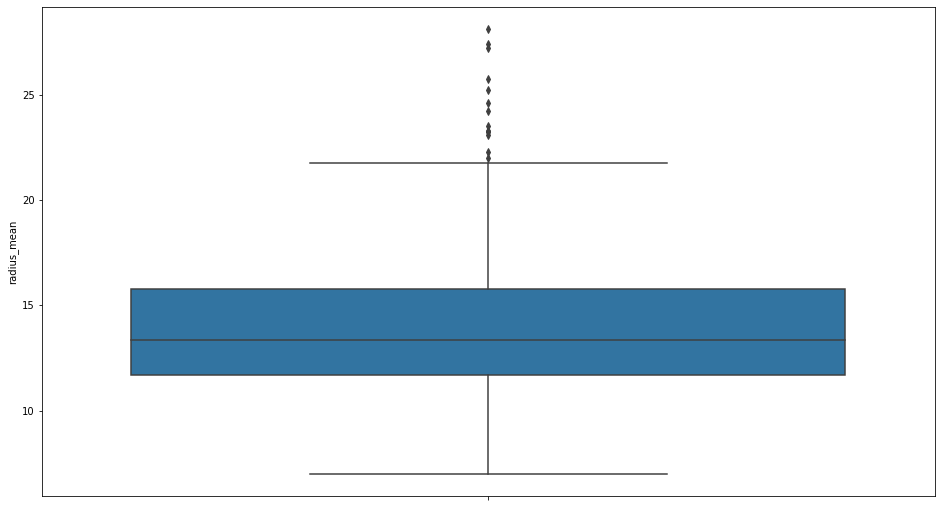

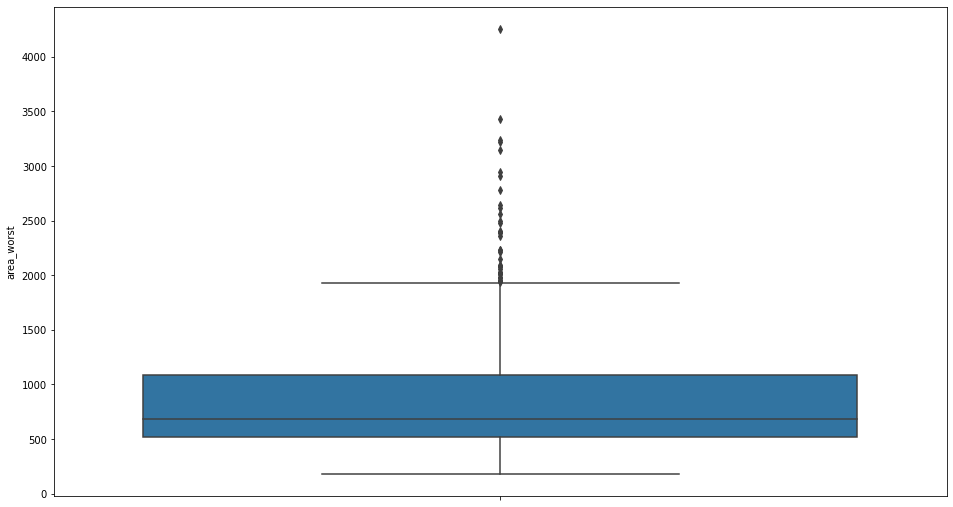

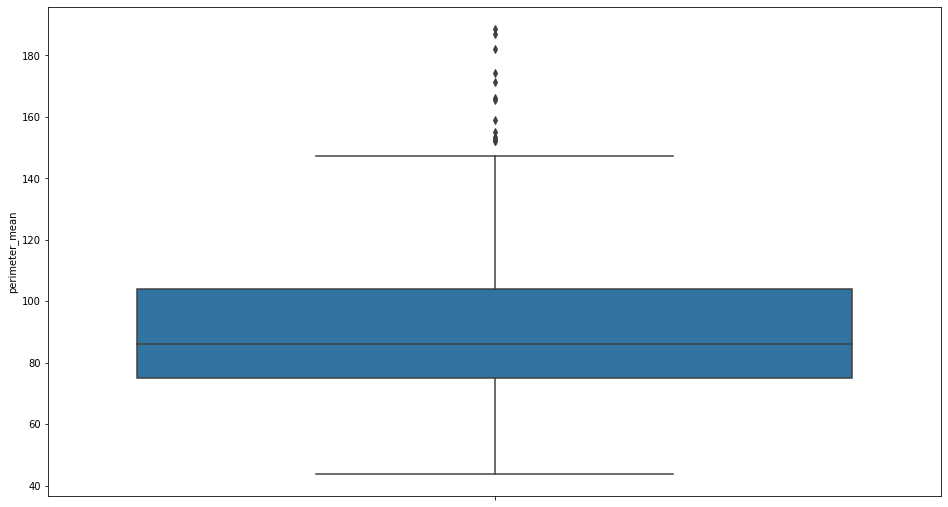

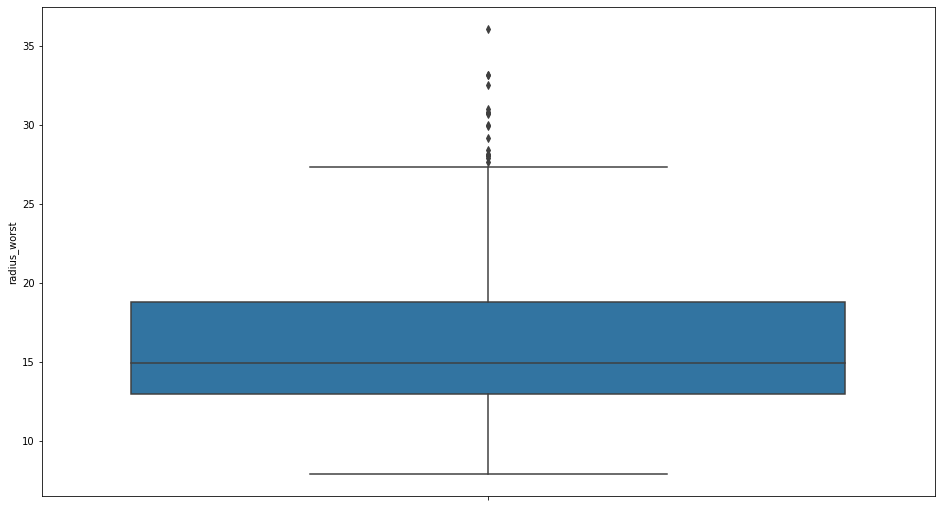

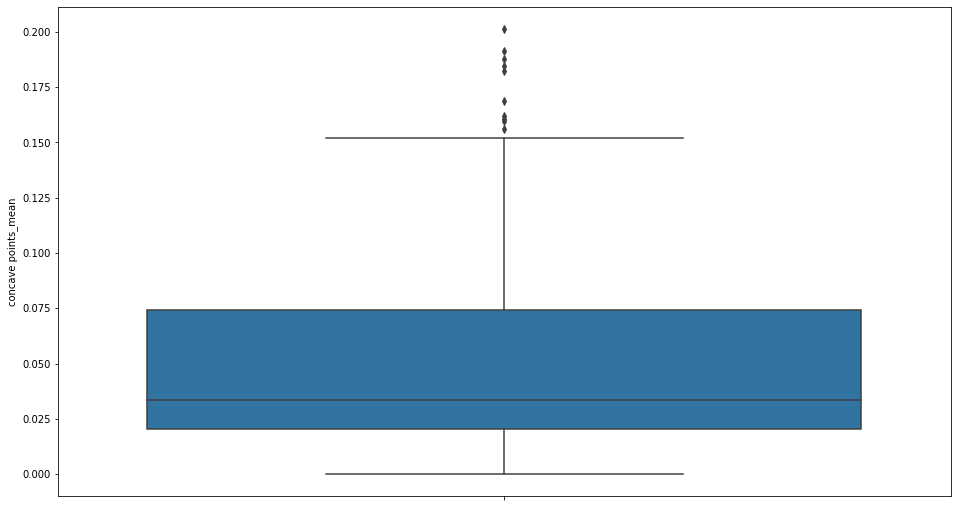

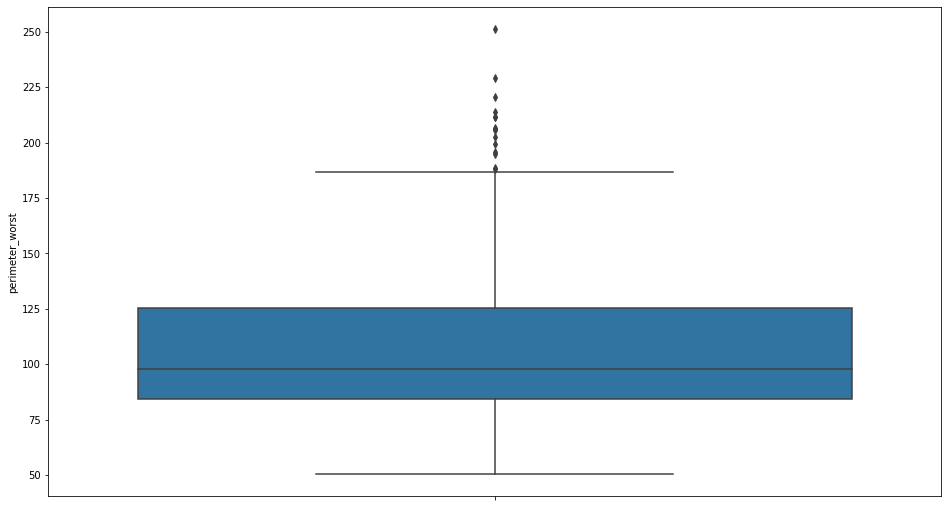

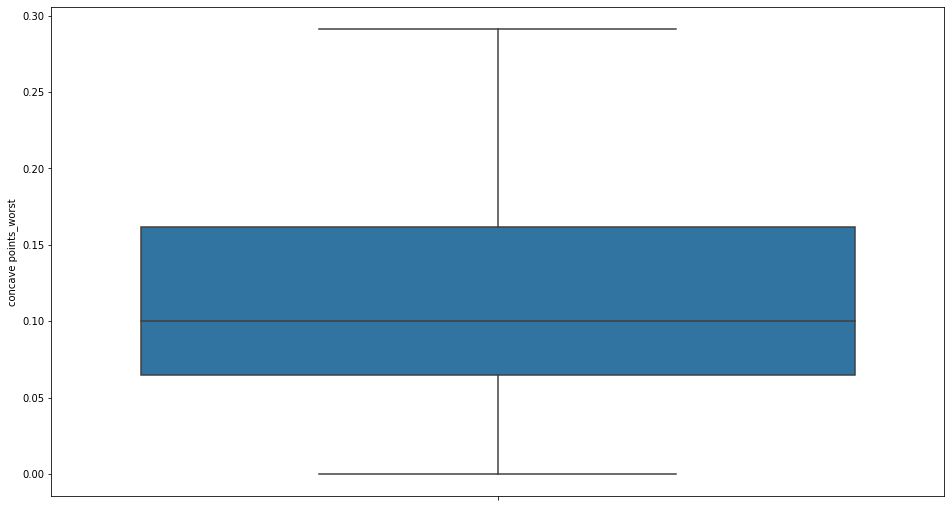

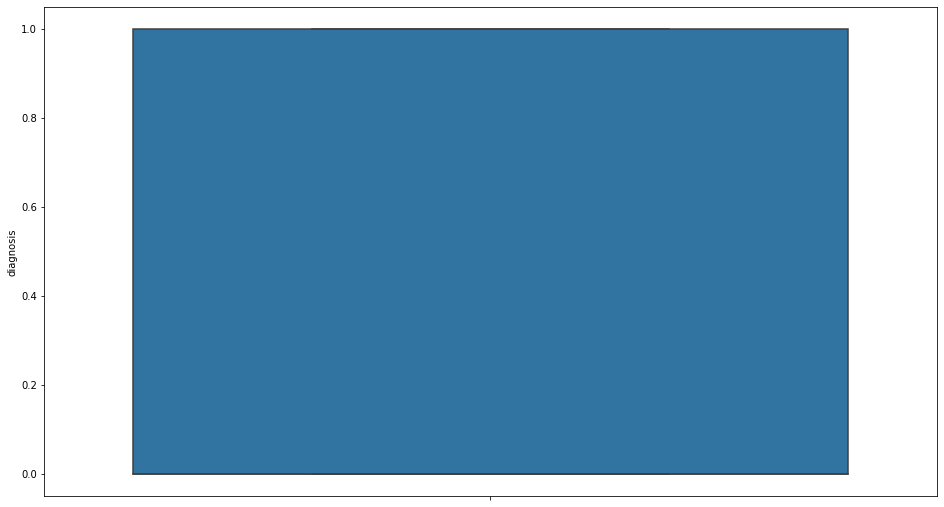

In [ ]:
for i in feature.index:
    plt.figure(figsize = (16, 9))
    sns.boxplot(data = d_set[feature.index], y = i, hue = 'diagnosis')
    plt.show()
    

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(d_set[feature.index].iloc[:, :-1], d_set['diagnosis'], test_size=0.3,random_state = 42)

In [ ]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((398, 7), (171, 7), (398,), (171,))

In [ ]:
print(X_train)

     radius_mean  area_worst  perimeter_mean  radius_worst  \
149       13.740       725.9           88.12        15.340   
124       13.370       632.1           86.10        14.260   
421       14.690       809.2           98.22        16.460   
195       12.910       600.6           82.53        13.880   
545       13.620       729.8           87.19        15.350   
..           ...         ...             ...           ...   
71         8.888       284.4           58.79         9.733   
106       11.640       521.7           75.17        13.140   
270       14.290       684.6           90.30        14.910   
435       13.980       869.3           91.12        17.040   
102       12.180       547.8           77.22        13.340   

     concave points_mean  perimeter_worst  concave points_worst  
149              0.01329            97.19               0.06019  
124              0.02800            91.99               0.08978  
421              0.06300           114.10               0

In [ ]:
print(X_test)

     radius_mean  area_worst  perimeter_mean  radius_worst  \
204       12.470       677.9           81.09         14.97   
70        18.940      1866.0          123.60         24.86   
131       15.460      1156.0          101.70         19.26   
431       12.400       515.8           81.47         12.88   
540       11.540       457.8           74.65         12.26   
..           ...         ...             ...           ...   
69        12.780       554.9           81.37         13.46   
542       14.740       826.4           94.70         16.51   
176        9.904       390.2           64.60         11.26   
501       13.820       788.0           92.33         16.01   
247       12.890       639.1           84.95         14.39   

     concave points_mean  perimeter_worst  concave points_worst  
204              0.03821            96.05               0.10150  
70               0.07951           165.90               0.17890  
131              0.08087           124.90               0

In [ ]:
print(Y_train)

149    0
124    0
421    0
195    0
545    0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 398, dtype: int32


In [ ]:
print(Y_test)

204    0
70     1
131    1
431    0
540    0
      ..
69     0
542    0
176    0
501    1
247    0
Name: diagnosis, Length: 171, dtype: int32


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit_transform(X_train)
mms.fit_transform(X_test)

array([[0.30094852, 0.15174941, 0.29206797, ..., 0.20710027, 0.27899016,
        0.34879725],
       [0.65568288, 0.51767895, 0.62493149, ..., 0.43094851, 0.70597225,
        0.61477663],
       [0.46488294, 0.29900209, 0.45344922, ..., 0.43831978, 0.45534568,
        0.52027491],
       ...,
       [0.16026098, 0.06313909, 0.1629473 , ..., 0.20140921, 0.13851702,
        0.34054983],
       [0.37496573, 0.18565973, 0.38007987, ..., 0.36634146, 0.33981295,
        0.52268041],
       [0.3239761 , 0.13979919, 0.32229269, ..., 0.21571816, 0.3337001 ,
        0.53642612]])

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter = 5000)
classifier.fit(X_train, Y_train)
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import f1_score
f1_logr = f1_score(Y_test, y_pred)
f1_logr

0.9593495934959351

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, y_pred)

array([[107,   1],
       [  4,  59]], dtype=int64)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       108
           1       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



In [ ]:
from sklearn.metrics import accuracy_score
accuracy_logr = classifier.score(X_test, Y_test)
accuracy_logr

0.9707602339181286

In [ ]:
from sklearn.metrics import precision_score
precision_logr = precision_score(Y_test, y_pred)
precision_logr

0.9833333333333333

In [ ]:
from sklearn.metrics import recall_score
recall_logr = recall_score(Y_test, y_pred)
recall_logr


0.9365079365079365

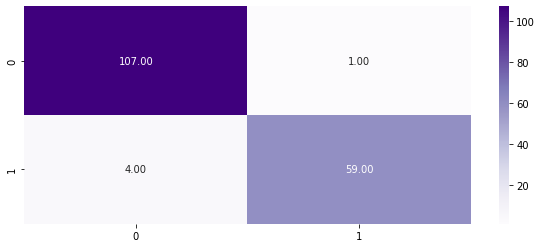

In [ ]:
plt.figure(figsize = (10, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='.2f', cmap = 'Purples')
plt.show()

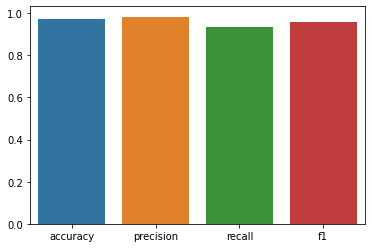

In [ ]:
bar_x = [accuracy_logr, precision_logr, recall_logr, f1_logr]
bar_y = ['accuracy', 'precision', 'recall', 'f1']
sns.barplot(y = bar_x, x = bar_y)
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
classifier_nb = GaussianNB()
classifier_nb.fit(X_train, Y_train)

GaussianNB()

In [ ]:
y_pred = classifier_nb.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
classifier_nb.score(X_test, Y_test)

0.9590643274853801

In [ ]:
f1_nb = f1_score(Y_test, y_pred)
f1_nb

0.943089430894309

In [ ]:
confusion_matrix(Y_test, y_pred)

array([[106,   2],
       [  5,  58]], dtype=int64)

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       108
           1       0.97      0.92      0.94        63

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
accuracy_nb = classifier.score(X_test, Y_test)
accuracy_nb

0.9707602339181286

In [ ]:
precision_nb = precision_score(Y_test, y_pred)
precision_nb

0.9666666666666667

In [ ]:
recall_nb = recall_score(Y_test, y_pred)
recall_nb

0.9206349206349206

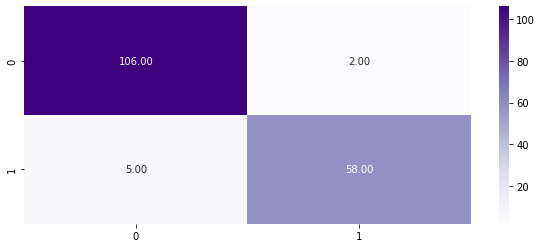

In [ ]:
plt.figure(figsize = (10, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='.2f', cmap = 'Purples')
plt.show()

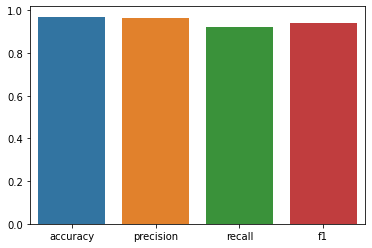

In [ ]:
bar_x = [accuracy_nb, precision_nb, recall_nb, f1_nb]
bar_y = ['accuracy', 'precision', 'recall', 'f1']
sns.barplot(y = bar_x, x = bar_y)
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
n = KNeighborsClassifier(n_neighbors=5)
n.fit(X_train, Y_train)

KNeighborsClassifier()

In [ ]:
y_pred = n.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
n.score(X_test, Y_test)

0.9239766081871345

In [ ]:
f1_knn = f1_score(Y_test, y_pred)
f1_knn

0.8959999999999999

In [ ]:
confusion_matrix(Y_test, y_pred)

array([[102,   6],
       [  7,  56]], dtype=int64)

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       108
           1       0.90      0.89      0.90        63

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.92      0.92      0.92       171



In [ ]:
accuracy_knn = accuracy_score(Y_test, y_pred)
accuracy_knn

0.9239766081871345

In [ ]:
precision_knn = precision_score(Y_test, y_pred)
precision_knn

0.9032258064516129

In [ ]:
recall_knn = recall_score(Y_test, y_pred)
recall_knn

0.8888888888888888

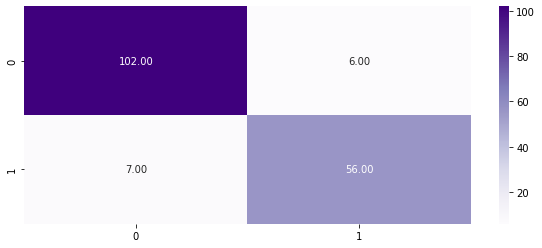

In [ ]:
plt.figure(figsize = (10, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='.2f', cmap = 'Purples')
plt.show()

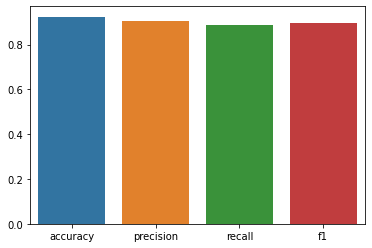

In [ ]:
bar_x = [accuracy_knn, precision_knn, recall_knn, f1_knn]
bar_y = ['accuracy', 'precision', 'recall', 'f1']
sns.barplot(y = bar_x, x = bar_y)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
d = DecisionTreeClassifier()
d.fit(X_train, Y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = d.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
d.score(X_test, Y_test)

0.9415204678362573

In [ ]:
f1_d = f1_score(Y_test, y_pred)
f1_d

0.9206349206349206

In [ ]:
confusion_matrix(Y_test, y_pred)

array([[103,   5],
       [  5,  58]], dtype=int64)

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       108
           1       0.92      0.92      0.92        63

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
accuracy_d = accuracy_score(Y_test, y_pred)
accuracy_d

0.9415204678362573

In [ ]:
precision_d = precision_score(Y_test, y_pred)
precision_d

0.9206349206349206

In [ ]:
recall_d = recall_score(Y_test, y_pred)
recall_d

0.9206349206349206

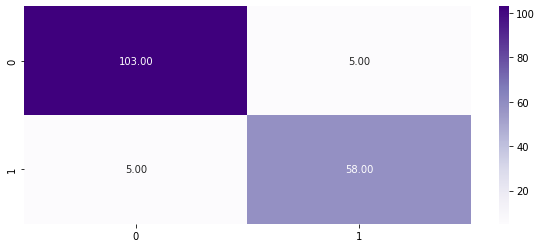

In [ ]:
plt.figure(figsize = (10, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='.2f', cmap = 'Purples')
plt.show()

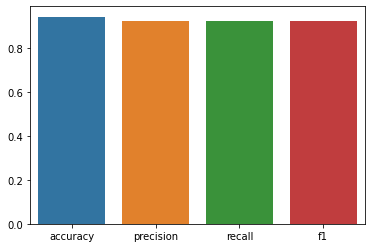

In [ ]:
bar_x = [accuracy_d, precision_d, recall_d, f1_d]
bar_y = ['accuracy', 'precision', 'recall', 'f1']
sns.barplot(y = bar_x, x = bar_y)
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=500)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=500)

In [ ]:
y_pred = rfc.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
rfc.score(X_test, Y_test)

0.9649122807017544

In [ ]:
f1_r = f1_score(Y_test, y_pred)
f1_r

0.9516129032258064

In [ ]:
confusion_matrix(Y_test, y_pred)

array([[106,   2],
       [  4,  59]], dtype=int64)

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       108
           1       0.97      0.94      0.95        63

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



In [ ]:
accuracy_r = accuracy_score(Y_test, y_pred)
accuracy_r

0.9649122807017544

In [ ]:
precision_r = precision_score(Y_test, y_pred)
precision_r

0.9672131147540983

In [ ]:
recall_r = recall_score(Y_test, y_pred)
recall_r

0.9365079365079365

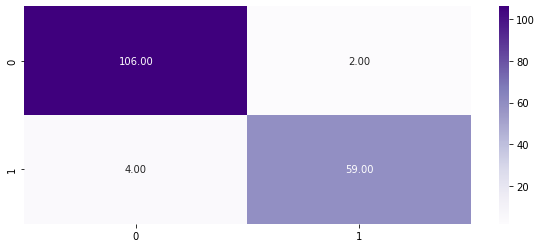

In [ ]:
plt.figure(figsize = (10, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='.2f', cmap = 'Purples')
plt.show()

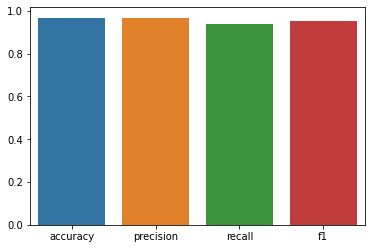

In [ ]:
bar_x = [accuracy_r, precision_r, recall_r, f1_r]
bar_y = ['accuracy', 'precision', 'recall', 'f1']
sns.barplot(y = bar_x, x = bar_y)
plt.show()

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'linear')
svm.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
y_pred = svm.predict(X_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [ ]:
svm.score(X_test, Y_test)

0.9824561403508771

In [ ]:
f1_sv = f1_score(Y_test, y_pred)
f1_sv

0.976

In [ ]:
confusion_matrix(Y_test, y_pred)

array([[107,   1],
       [  2,  61]], dtype=int64)

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       108
           1       0.98      0.97      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



In [ ]:
accuracy_sv = accuracy_score(Y_test, y_pred)
accuracy_sv

0.9824561403508771

In [ ]:
precision_sv = precision_score(Y_test, y_pred)
precision_sv

0.9838709677419355

In [ ]:
recall_sv = recall_score(Y_test, y_pred)
recall_sv

0.9682539682539683

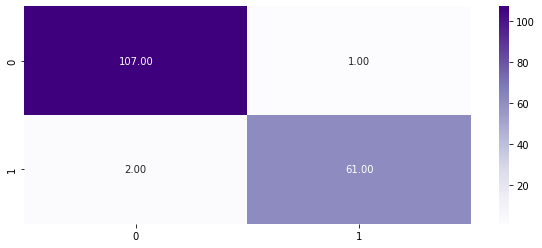

In [ ]:
plt.figure(figsize = (10, 4))
sns.heatmap(confusion_matrix(Y_test, y_pred), annot=True, fmt='.2f', cmap = 'Purples')
plt.show()

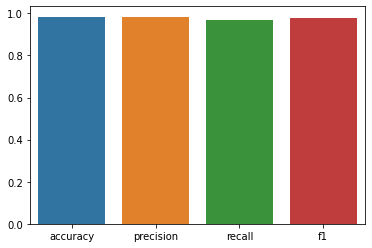

In [ ]:
bar_x = [accuracy_sv, precision_sv, recall_sv, f1_sv]
bar_y = ['accuracy', 'precision', 'recall', 'f1']
sns.barplot(y = bar_x, x = bar_y)
plt.show()

In [ ]:
data_m = {'logistic_r':[accuracy_logr, precision_logr, recall_logr, f1_logr], 'g_nb': [accuracy_nb, precision_nb, recall_nb, f1_nb], 'knn': [accuracy_knn, precision_knn, recall_knn, f1_knn], 'dtc': [accuracy_d, precision_d, recall_d, f1_d], 'rfc': [accuracy_r, precision_r, recall_r, f1_r], 'svm': [accuracy_sv, precision_sv, recall_sv, f1_sv]}


In [ ]:
data_m = pd.DataFrame(data_m, columns = data_m.keys(), index = ['accuracy', 'precision', 'recall', 'f1'])
data_m

,logistic_r,g_nb,knn,dtc,rfc,svm
accuracy,0.970760,0.970760,0.923977,0.941520,0.964912,0.982456
precision,0.983333,0.966667,0.903226,0.920635,0.967213,0.983871
recall,0.936508,0.920635,0.888889,0.920635,0.936508,0.968254
f1,0.959350,0.943089,0.896000,0.920635,0.951613,0.976000


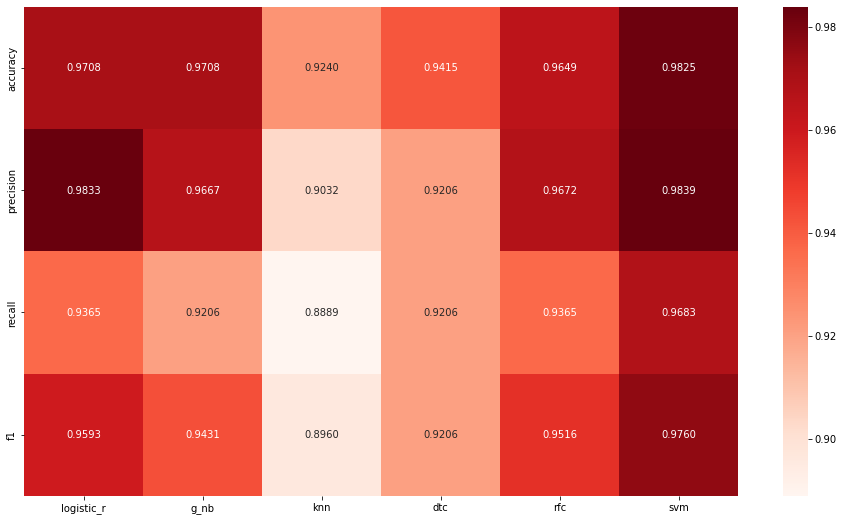

In [ ]:
plt.figure(figsize = (16, 9))
sns.heatmap(data_m, annot = True, cmap = "Reds", fmt = '.4f')
plt.show()